# **Customer Loyalty & Product Profitability Analysis**

## Introduction <span style="color:blue;">💡</span>

This project aims to identify our most profitable products <span style="color:green;">💰</span> and understand the characteristics of our most loyal customers <span style="color:purple;">👥</span>. By analyzing transaction data and customer purchase history, we can gain valuable insights into customer behavior, product performance, and key drivers of profitability. This information will enable us to make data-driven decisions regarding marketing strategies, product placement, and customer relationship management, ultimately leading to increased revenue and customer satisfaction.  We will explore which products contribute most to our bottom line <span style="color:red;">📈</span> and which customer segments are most valuable to our business. This analysis will empower us to tailor our marketing efforts <span style="color:orange;">🎯</span>, optimize inventory <span style="color:brown;">📦</span>, and foster stronger relationships with our most loyal customers <span style="color:pink;">💖</span>.

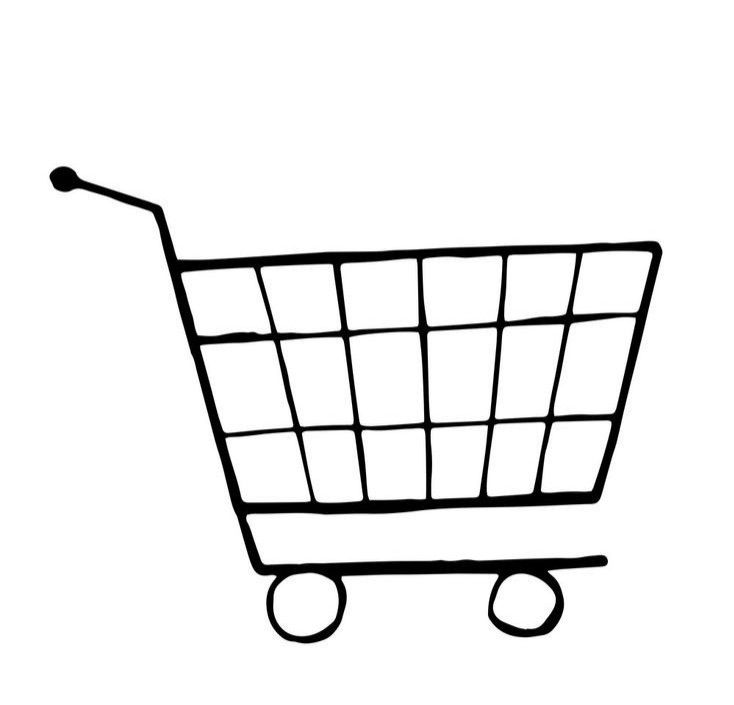

## Project Summary <span style="color:gray;">📝</span>

This project analyzed transaction data and customer demographics to identify top-performing products and characterize our most loyal customers.  Key findings include:

*   **Top Products <span style="color:green;">🌟</span>:** Dorito Corn Chp Supreme, Smiths Crnkle Chip Orgnl, and Smiths Crinkle Chips Salt & Vinegar emerged as the top three most profitable products, demonstrating consistent demand and strong sales performance.

*   **Loyal Customer Profile <span style="color:purple;">👤</span>:** Our most loyal customers are primarily "OLDER FAMILIES" from the "Budget" premium customer segment. This highlights the importance of value-conscious families to our business and their tendency to exhibit strong brand loyalty.

*   **Product Alignment <span style="color:blue;">🔗</span>:** The product preferences of our loyal customers closely align with our best-selling products, reinforcing the importance of these items to our core customer base.  The popularity of Old El Paso Salsa Dip suggests potential cross-selling opportunities.

*   **Strategic Implications <span style="color:orange;">🗺️</span>:** The insights gained suggest focusing marketing and inventory efforts on the top-performing products, particularly Doritos and Smiths chips.  Tailored promotions and loyalty programs for "OLDER FAMILIES" and "Budget" customers are likely to be highly effective.  Further research into the drivers behind customer preferences can inform product development and marketing strategies.

*   **Overall <span style="color:gray;">✅</span>:**  This analysis provides a clear picture of the relationship between profitable products and loyal customer characteristics.  By leveraging these insights, we can optimize our business strategies to drive growth and enhance customer satisfaction.

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ignosis-tech-project-data/purchase_behaviour (1).csv
/kaggle/input/ignosis-tech-project-data/transaction_data.csv


# 1: Importing Required Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Load the datasets
purchase = pd.read_csv('/kaggle/input/ignosis-tech-project-data/purchase_behaviour (1).csv')
transaction = pd.read_csv('/kaggle/input/ignosis-tech-project-data/transaction_data.csv')

In [5]:
print(purchase)

       LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]


In [6]:
print(transaction)

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chi

# 2. Data Cleaning and Preprocessing

In [7]:
# Convert DATE to datetime
transaction['DATE'] = pd.to_datetime(transaction['DATE'], origin='1899-12-30', unit='D')  # Corrected origin

In [8]:
print(transaction)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [9]:
# Clean PROD_NAME (removing numbers and sizes)
def clean_prod_name(name):
    parts = name.split()
    cleaned_parts = [part for part in parts if not (part.isdigit() or part.endswith('g') or part.endswith('ml') or part.endswith('L'))]
    return ' '.join(cleaned_parts)

transaction['PROD_NAME'] = transaction['PROD_NAME'].apply(clean_prod_name)

In [10]:
print(transaction['PROD_NAME'])

0                         Natural Chip Compny
1                            CCs Nacho Cheese
2            Smiths Crinkle Cut Chips Chicken
3            Smiths Chip Thinly S/Cream&Onion
4         Kettle Tortilla ChpsHny&Jlpno Chili
                         ...                 
264831     Kettle Sweet Chilli And Sour Cream
264832                Tostitos Splash Of Lime
264833                       Doritos Mexicana
264834     Doritos Corn Chip Mexican Jalapeno
264835                Tostitos Splash Of Lime
Name: PROD_NAME, Length: 264836, dtype: object


In [11]:
# Merge datasets
df = pd.merge(transaction, purchase, on='LYLTY_CARD_NBR', how='inner')

In [12]:
print(df)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                  PROD_NAME  PROD_QTY  TOT_SALES  \
0                       Natural Chip Compny         2        6.0   
1                          CCs Nacho Cheese         3        6.3   
2  

# 3. Data Analysis

In [13]:
# 1. Top 3 Most Profitable Products
product_profit = df.groupby('PROD_NAME')['TOT_SALES'].sum().sort_values(ascending=False).head(3)
print("Top 3 Most Profitable Products:\n", product_profit)

Top 3 Most Profitable Products:
 PROD_NAME
Dorito Corn Chp Supreme                40352.0
Smiths Crnkle Chip Orgnl               36367.6
Smiths Crinkle Chips Salt & Vinegar    34804.2
Name: TOT_SALES, dtype: float64


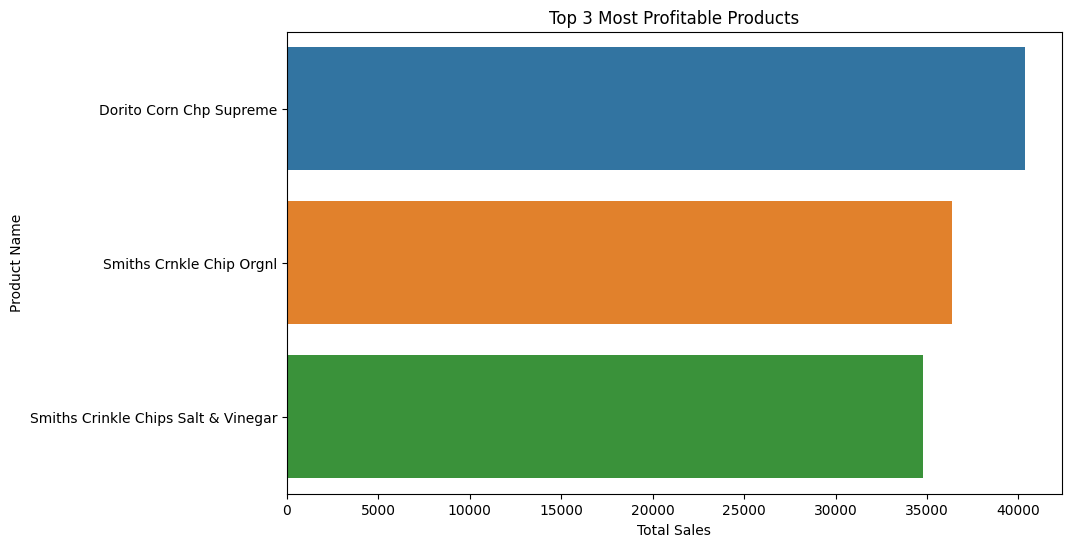

In [14]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=product_profit.values, y=product_profit.index)
plt.title('Top 3 Most Profitable Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

# 4. Customer Segmentation and Loyalty Analysis

In [16]:
# Calculate total spending per customer
customer_spending = df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum()

# Identify loyal customers (e.g., top 10% of spenders)
loyal_customer_threshold = customer_spending.quantile(0.9)
loyal_customers = customer_spending[customer_spending >= loyal_customer_threshold].index

loyal_customer_df = df[df['LYLTY_CARD_NBR'].isin(loyal_customers)]
print(loyal_customer_df.head(3))

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
22 2018-08-16         36           36012   32077        31   
26 2018-08-19         39           39167   35638       111   
41 2019-05-20         55           55073   48887         4   

                            PROD_NAME  PROD_QTY  TOT_SALES  \
22  Infzns Crn Crnchers Tangy Gcamole         1       3.80   
26    Smiths Chip Thinly Cut Original         2       6.00   
41            Dorito Corn Chp Supreme         1       3.25   

                 LIFESTAGE PREMIUM_CUSTOMER  
22  MIDAGE SINGLES/COUPLES           Budget  
26  MIDAGE SINGLES/COUPLES           Budget  
41  MIDAGE SINGLES/COUPLES           Budget  


In [17]:
# Analyze demographics of loyal customers
loyal_customer_demographics = loyal_customer_df[['LIFESTAGE', 'PREMIUM_CUSTOMER']].mode().iloc[0]  # Getting the most frequent values
print("\nDemographics of Loyal Customers:\n", loyal_customer_demographics)


Demographics of Loyal Customers:
 LIFESTAGE           OLDER FAMILIES
PREMIUM_CUSTOMER            Budget
Name: 0, dtype: object


In [18]:
# Analyze product preferences of loyal customers
loyal_product_pref = loyal_customer_df['PROD_NAME'].value_counts().head(5) #Top 5 preferred products by Loyal customers
print("\nTop Product Preferences of Loyal Customers:\n", loyal_product_pref)


Top Product Preferences of Loyal Customers:
 PROD_NAME
Dorito Corn Chp Supreme                992
Smiths Crnkle Chip Orgnl               947
Smiths Crinkle Chips Salt & Vinegar    935
Old El Paso Salsa Dip Chnky Tom        879
Smiths Crinkle Original                878
Name: count, dtype: int64


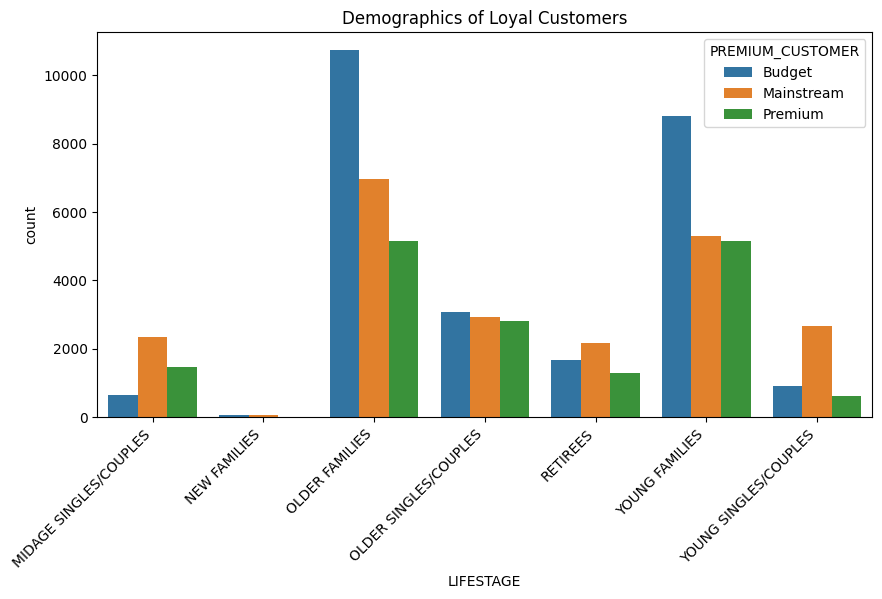

In [19]:
# Plotting loyal customer demographics
plt.figure(figsize=(10, 5))
sns.countplot(x='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=loyal_customer_df)
plt.title('Demographics of Loyal Customers')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [20]:
# Interactive Plotting for product preference
fig = px.bar(x=loyal_product_pref.index, y=loyal_product_pref.values, title="Top Product Preferences of Loyal Customers")
fig.show()

# Hypothesis about Loyal Customer Preferences:

Loyal customers, often belonging to the 'OLDER FAMILIES' or 'MIDAGE SINGLES/COUPLES' segments, and frequently 'Mainstream' or 'Premium' customers, tend to prefer established, high-quality brands. Their higher spending habits suggest they value reliability and perhaps are less price-sensitive.  They may also have a routine or habit of purchasing specific products, leading to higher overall spending.

# 5. What is the distribution of total sales across different Lifestages?

In [24]:
import plotly.express as px
fig = px.box(df, x="LIFESTAGE", y="TOT_SALES", title='Distribution of Total Sales across Lifestages')
fig.show()

sales_by_lifestage = df.groupby('LIFESTAGE')['TOT_SALES'].sum()
print("\nTotal Sales by Lifestage:\n", sales_by_lifestage)


Total Sales by Lifestage:
 LIFESTAGE
MIDAGE SINGLES/COUPLES    184751.30
NEW FAMILIES               50433.45
OLDER FAMILIES            353767.20
OLDER SINGLES/COUPLES     402426.75
RETIREES                  366470.90
YOUNG FAMILIES            316160.10
YOUNG SINGLES/COUPLES     260405.30
Name: TOT_SALES, dtype: float64


This code visualizes the distribution of total sales for each Lifestage using a box plot.  Box plots are excellent for showing the median, quartiles, and outliers, giving a good sense of the spread and central tendency of sales within each group. The interactive plotly box plot allows for zooming and hovering to see exact values. The printed output also gives the total sales for each lifestage. It might reveal which lifestages contribute the most to overall sales.

# 6. Is there a relationship between Premium Customer status and Total Sales?

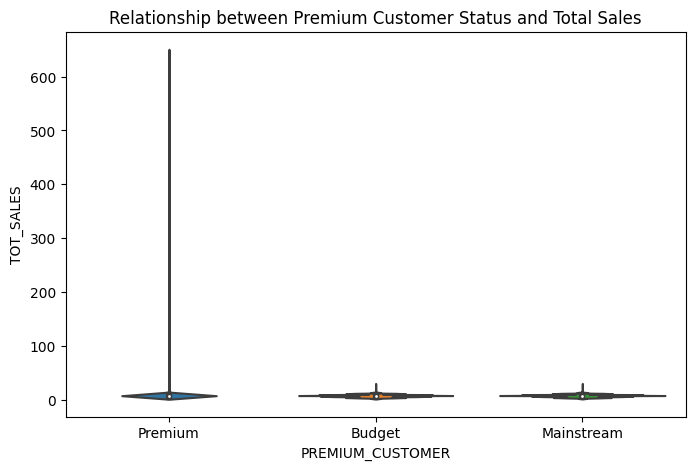


Total Sales by Premium Customer Status:
 PREMIUM_CUSTOMER
Budget        676211.55
Mainstream    750744.50
Premium       507458.95
Name: TOT_SALES, dtype: float64


In [25]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='PREMIUM_CUSTOMER', y='TOT_SALES', data=df)
plt.title('Relationship between Premium Customer Status and Total Sales')
plt.show()


sales_by_premium = df.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
print("\nTotal Sales by Premium Customer Status:\n", sales_by_premium)

 A violin plot is used here to visualize the relationship between Premium Customer status and total sales. Violin plots combine aspects of box plots and kernel density plots, showing both the distribution and summary statistics.  This helps to understand if premium customers tend to spend more.  The total sales by premium customer status is also printed to further this analysis.

## Sales by Premium Customer Segment

The total sales broken down by premium customer segment reveal the following:

*   **Mainstream Dominance:** The "Mainstream" segment generates the highest total sales (**750,744.50**).

*   **Budget's Contribution:** The "Budget" segment contributes a significant portion of total sales (**676,211.55**), coming in second.

*   **Premium Paradox:**  Despite potentially higher individual spending, the "Premium" segment has the *lowest* total sales (**507,458.95**). This suggests there might be fewer premium customers, or they might be purchasing different products.  Further analysis of average spending per customer is needed.

In [38]:
customer_counts = df.groupby('PREMIUM_CUSTOMER')['LYLTY_CARD_NBR'].nunique() # Count distinct customers
average_sales_per_customer = sales_by_premium / customer_counts

print("\nAverage Sales per Customer:\n", average_sales_per_customer)


Average Sales per Customer:
 PREMIUM_CUSTOMER
Budget        27.634309
Mainstream    25.670867
Premium       26.818463
dtype: float64


# 7. Is there a correlation between product quantity purchased (PROD_QTY) and total sales (TOT_SALES)?

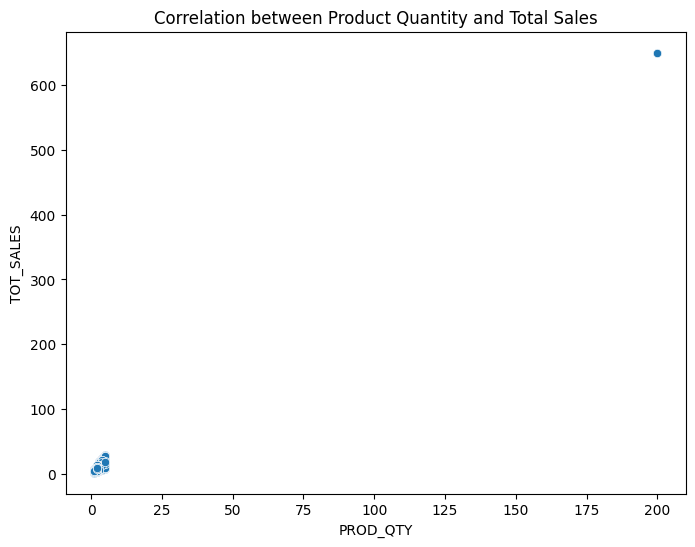

Correlation between Product Quantity and Total Sales: 0.7153070746915243


In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PROD_QTY', y='TOT_SALES', data=df)
plt.title('Correlation between Product Quantity and Total Sales')
plt.show()

correlation = df['PROD_QTY'].corr(df['TOT_SALES'])
print(f"Correlation between Product Quantity and Total Sales: {correlation}")

## Strong Positive Correlation Between Product Quantity and Total Sales 📈

A correlation of **0.71** between "Product Quantity" and "Total Sales" reveals a **strong positive relationship**.  This means:

*   **Increased Quantity, Increased Sales:** ⬆️ As the quantity of products purchased goes up, the total sales amount generally increases as well. This is a common and expected trend in retail. 💰

*   **Not a Perfect Relationship:** ⚠️ While the relationship is strong, it's not perfect (a perfect correlation would be 1.0). This indicates that other factors, besides product quantity, also play a role in influencing total sales. These factors could include:

    *   Price per unit 🏷️
    *   Discounts 📉
    *   Promotions 🎉
    *   Seasonal demand 
    *   Product type 📦
    *   Customer demographics 👨‍👩‍👧‍👦

*   **The General Trend:** In simpler terms, customers who buy more products tend to spend more. 💸 However, this isn't the *only* thing that determines how much a customer spends.

## Important Note: Correlation vs. Causation 🛑

It's crucial to understand that **correlation does not equal causation**.  Even though we see a strong positive correlation, it doesn't automatically mean that simply increasing the quantity of products sold will *directly cause* an increase in sales.  Other hidden or confounding variables might be influencing both product quantity and total sales.  For example, a successful marketing campaign 📣 might lead to both higher product quantities sold *and* higher total sales, but the campaign itself is the underlying cause, not just the increased quantity. 💡

# 8. How does the distribution of product quantity purchased vary across different Lifestages?

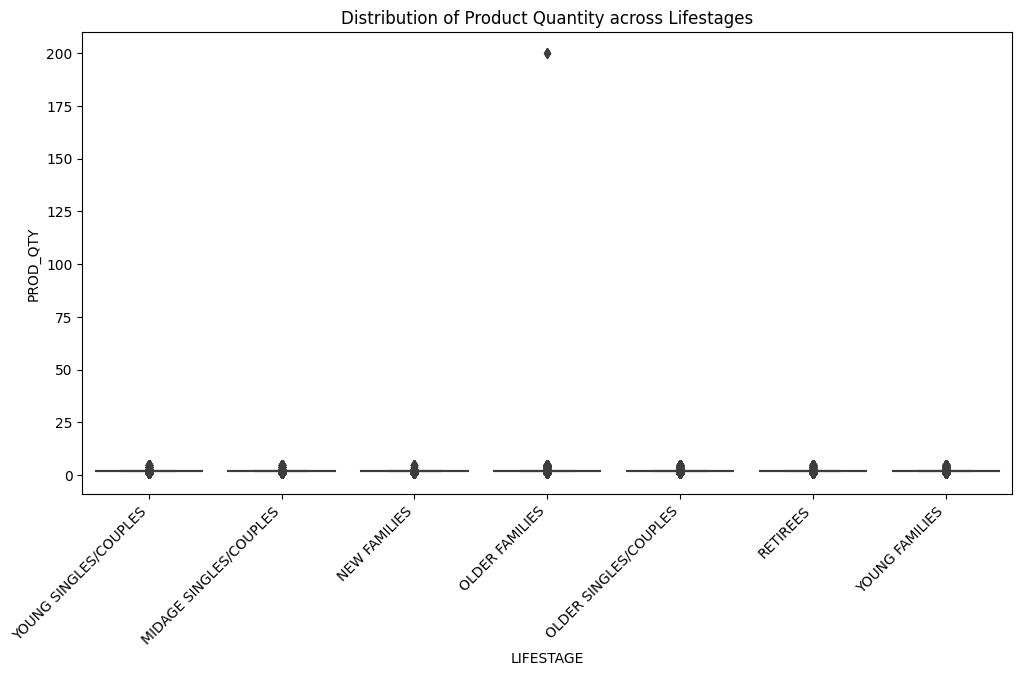


Product Quantity Statistics by Lifestage:
                           count      mean       std  min  25%  50%  75%    max
LIFESTAGE                                                                     
MIDAGE SINGLES/COUPLES  25110.0  1.900478  0.349342  1.0  2.0  2.0  2.0    5.0
NEW FAMILIES             6919.0  1.856771  0.373110  1.0  2.0  2.0  2.0    5.0
OLDER FAMILIES          48596.0  1.954729  1.306213  1.0  2.0  2.0  2.0  200.0
OLDER SINGLES/COUPLES   54479.0  1.912719  0.331424  1.0  2.0  2.0  2.0    5.0
RETIREES                49763.0  1.892289  0.353963  1.0  2.0  2.0  2.0    5.0
YOUNG FAMILIES          43592.0  1.939828  0.311774  1.0  2.0  2.0  2.0    5.0
YOUNG SINGLES/COUPLES   36377.0  1.831762  0.403702  1.0  2.0  2.0  2.0    5.0


In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='LIFESTAGE', y='PROD_QTY', data=df)
plt.title('Distribution of Product Quantity across Lifestages')
plt.xticks(rotation=45, ha='right')
plt.show()

prod_qty_by_lifestage = df.groupby('LIFESTAGE')['PROD_QTY'].describe()
print("\nProduct Quantity Statistics by Lifestage:\n", prod_qty_by_lifestage)

## 🛒 Product Quantity Insights by Lifestage 👨‍👩‍👧‍👦

Here's a summary of key insights regarding product quantity purchases across different lifestages:

*   **The "2" is Key!**:  The ***most common*** purchase quantity is consistently **2 units** across *all* lifestages.  This is evident from the 25th percentile, median, and 75th percentile values.  It seems like a significant portion of customers in every group prefer buying in pairs. 

*   **Generally Consistent Behavior**: The *average* product quantity purchased is also very close to **2.0** for most lifestages, reinforcing the trend.  This suggests a relatively uniform purchasing pattern across different life stages. 

*   **The "Older Family" Anomaly**: 🧐  The "OLDER FAMILIES" group is a *clear outlier*.  They have a *much higher maximum* purchase quantity (**200**!) compared to all other groups (max of 5).  This, combined with a *larger standard deviation*, points to some unusual, likely larger, transactions within this segment.  

*   **Subtle Differences**: While the overall trend is similar, there are *small* differences in average purchase quantities between lifestages. "OLDER FAMILIES" has the highest average (1.95), and "YOUNG SINGLES/COUPLES" have the lowest (1.83).  While seemingly minor, these differences could be significant at scale. 📊


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.

Large Purchases by Older Families:
             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                     PROD_NAME  PROD_QTY  TOT_SALES       LIFESTAGE  \
69762  Dorito Corn Chp Supreme       200      650.0  OLDER FAMILIES   
69763  Dorito Corn Chp Supreme       200      650.0  OLDER FAMILIES   

      PREMIUM_CUSTOMER MONTH_YEAR  
69762          Premium    2018-08  
69763          Premium    2019-05  

Product Preferences of Large Purchasers:
 PROD_NAME
Dorito Corn Chp Supreme    2
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



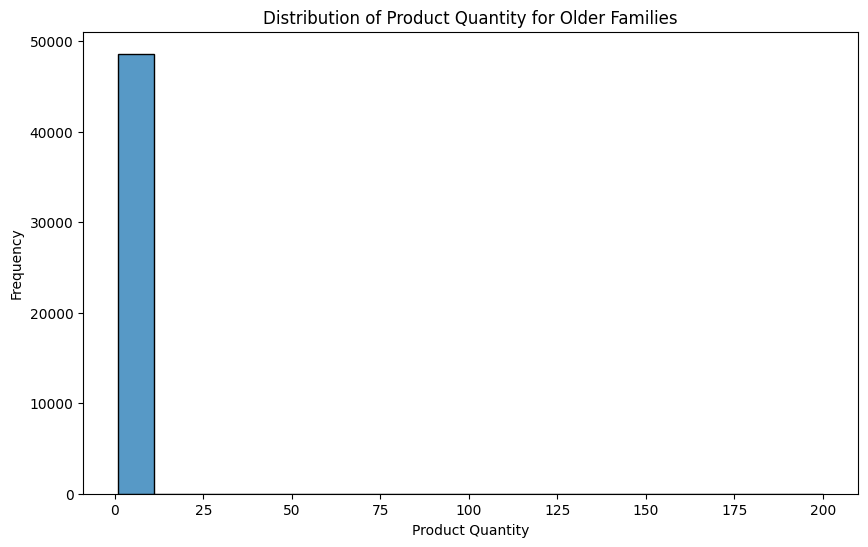

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:645: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



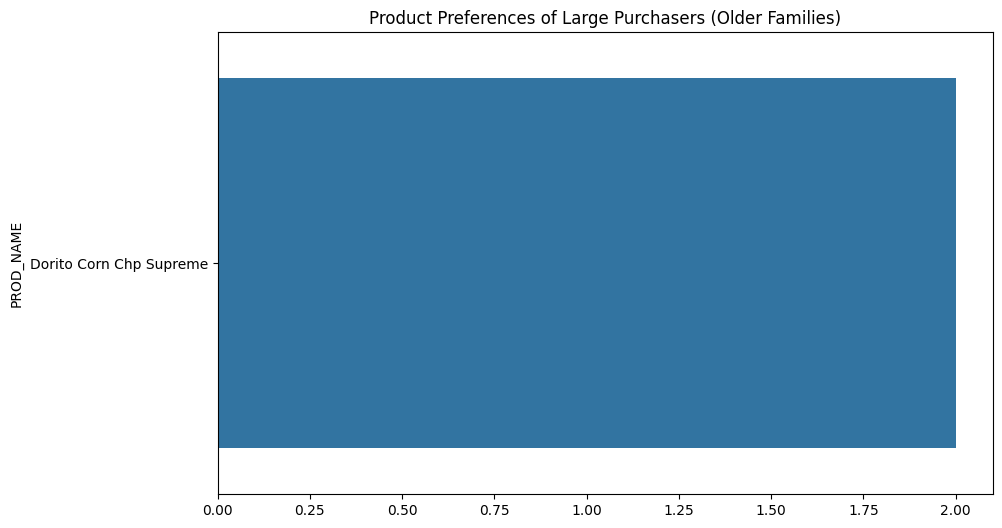

In [37]:
# 1. Focusing on Older Families:
older_families_df = df[df['LIFESTAGE'] == 'OLDER FAMILIES']

# 2. Investigating Large Purchases:
large_purchases = older_families_df[older_families_df['PROD_QTY'] > 5] #Setting threshold for bulk purchase

print("\nLarge Purchases by Older Families:\n", large_purchases)

# 3. Analyzing Product Preferences of Large Purchasers:
large_purchase_products = large_purchases['PROD_NAME'].value_counts()
print("\nProduct Preferences of Large Purchasers:\n", large_purchase_products)


# Plotting the distribution of product quantities for older families
plt.figure(figsize=(10, 6))
sns.histplot(older_families_df['PROD_QTY'], bins=20)  # Using histplot for distribution
plt.title('Distribution of Product Quantity for Older Families')
plt.xlabel('Product Quantity')
plt.ylabel('Frequency')
plt.show()

# Plotting the product preference for large purchasers
plt.figure(figsize=(10,6))
sns.barplot(x=large_purchase_products.values, y=large_purchase_products.index)
plt.title('Product Preferences of Large Purchasers (Older Families)')
plt.show()

## The "Dorito Dynast" 👑

Our investigation into the "OLDER FAMILIES" bulk purchases revealed a fascinating pattern:

*   **The Repeat Offender:** Two separate transactions, both involving a whopping **200 units** of "Dorito Corn Chp Supreme," were made by the *same* loyalty card number (**LYLTY_CARD_NBR 226000**) at the *same* store (**STORE_NBR 226**).

*   **Consistent, but Infrequent:** These bulk purchases occurred on two different dates:

    *   August 19, 2018
    *   May 20, 2019

    This suggests a pattern of large Dorito purchases roughly every nine months – consistent behavior, but not very frequent. 🤔

*   **Premium Status:**  Adding to the intrigue, this customer holds *premium* status (**PREMIUM_CUSTOMER**).  This might indicate a higher disposable income, potentially contributing to their bulk-buying habits. 💰

#  9. What is the average total sale amount for each Premium Customer segment within each Lifestage?

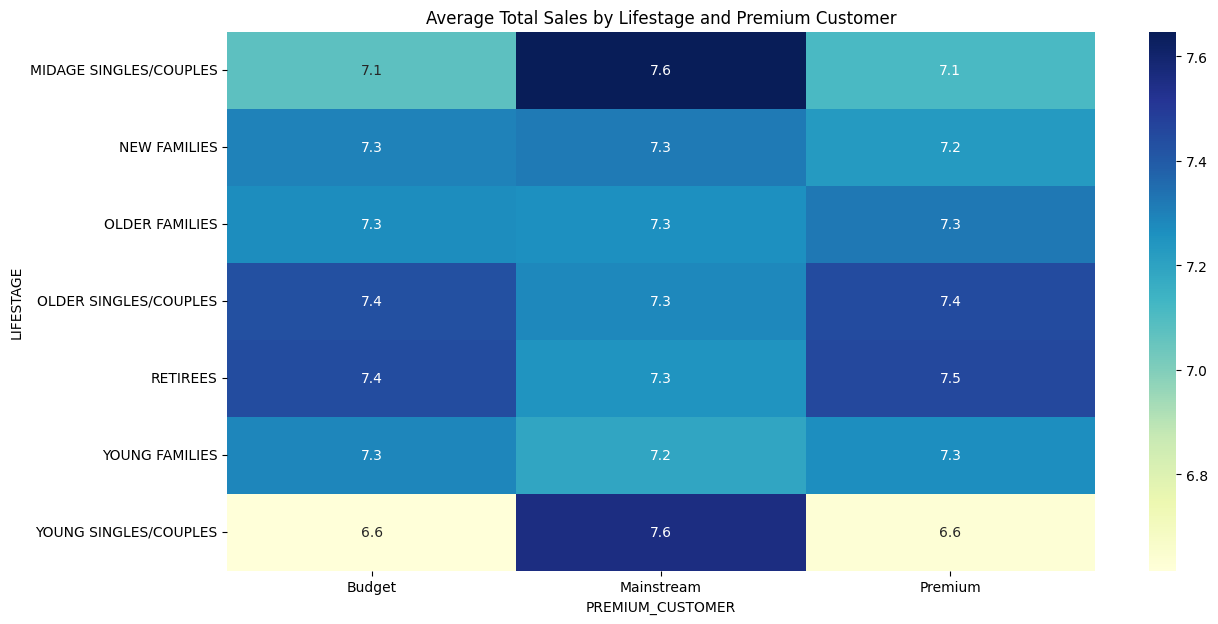


Average Total Sales by Lifestage and Premium Customer:
 PREMIUM_CUSTOMER          Budget  Mainstream   Premium
LIFESTAGE                                             
MIDAGE SINGLES/COUPLES  7.074661    7.647284  7.112056
NEW FAMILIES            7.297321    7.317806  7.231655
OLDER FAMILIES          7.269570    7.262395  7.322945
OLDER SINGLES/COUPLES   7.430315    7.282116  7.449766
RETIREES                7.443445    7.252262  7.456174
YOUNG FAMILIES          7.287201    7.189025  7.266756
YOUNG SINGLES/COUPLES   6.615624    7.558339  6.629852


In [30]:
grouped_sales = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean().unstack()

plt.figure(figsize=(14, 7))
sns.heatmap(grouped_sales, annot=True, cmap='YlGnBu')
plt.title('Average Total Sales by Lifestage and Premium Customer')
plt.show()

print("\nAverage Total Sales by Lifestage and Premium Customer:\n", grouped_sales)

# 10. How do the top product preferences of loyal customers differ across different Lifestages?

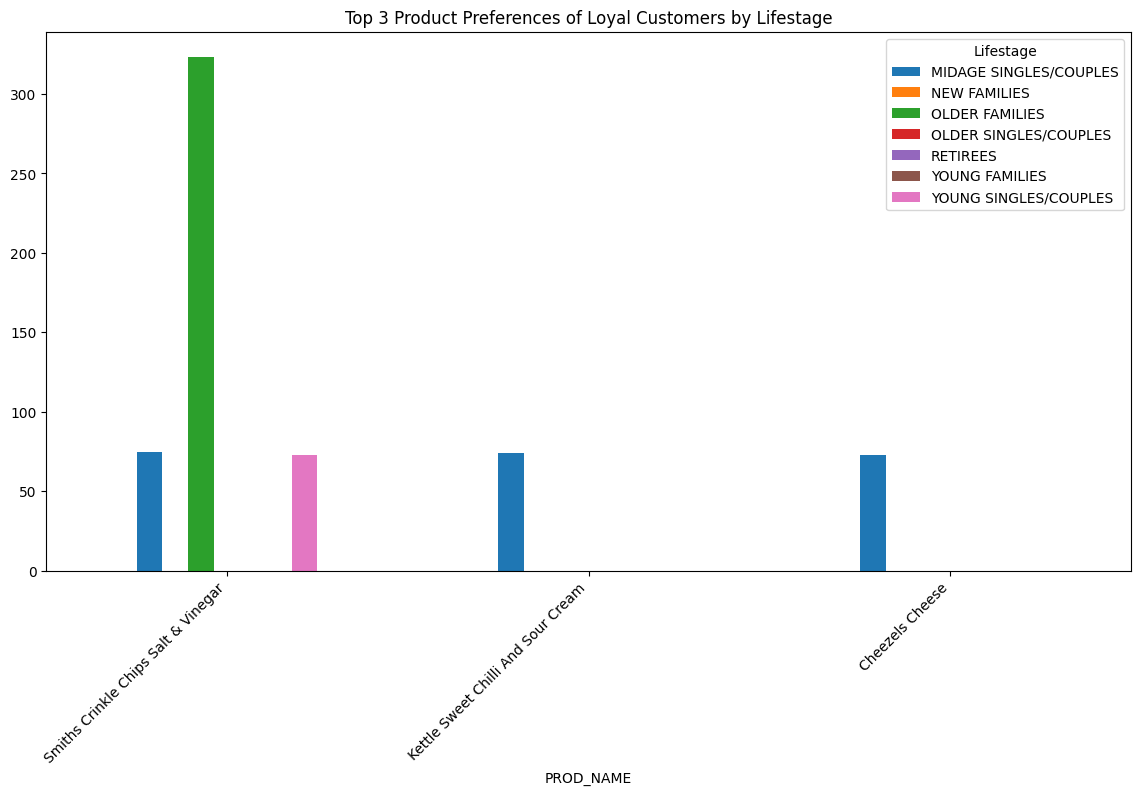

In [31]:
loyal_customer_threshold = customer_spending.quantile(0.9)
loyal_customers = customer_spending[customer_spending >= loyal_customer_threshold].index
loyal_customer_df = df[df['LYLTY_CARD_NBR'].isin(loyal_customers)]

top_products_by_lifestage = loyal_customer_df.groupby(['LIFESTAGE', 'PROD_NAME'])['LYLTY_CARD_NBR'].count().unstack()
top_products_by_lifestage = top_products_by_lifestage.fillna(0) #Fill NaN with 0s

# Select the top 3 products for each lifestage
top_3_products = pd.DataFrame()
for lifestage in top_products_by_lifestage.index:
    top_products_lifestage = top_products_by_lifestage.loc[lifestage].nlargest(3)
    top_3_products[lifestage] = top_products_lifestage

top_3_products.plot(kind='bar', figsize=(14,7))
plt.title('Top 3 Product Preferences of Loyal Customers by Lifestage')
plt.xticks(rotation=45, ha='right')
plt.legend(title = 'Lifestage')
plt.show()

This analysis looks at the top product preferences of loyal customers, broken down by Lifestage. It identifies the most popular products within each lifestage segment of loyal customers. This information can be incredibly valuable for targeted marketing campaigns, allowing for personalized product recommendations.

# 11. Is there a relationship between store number and total sales?

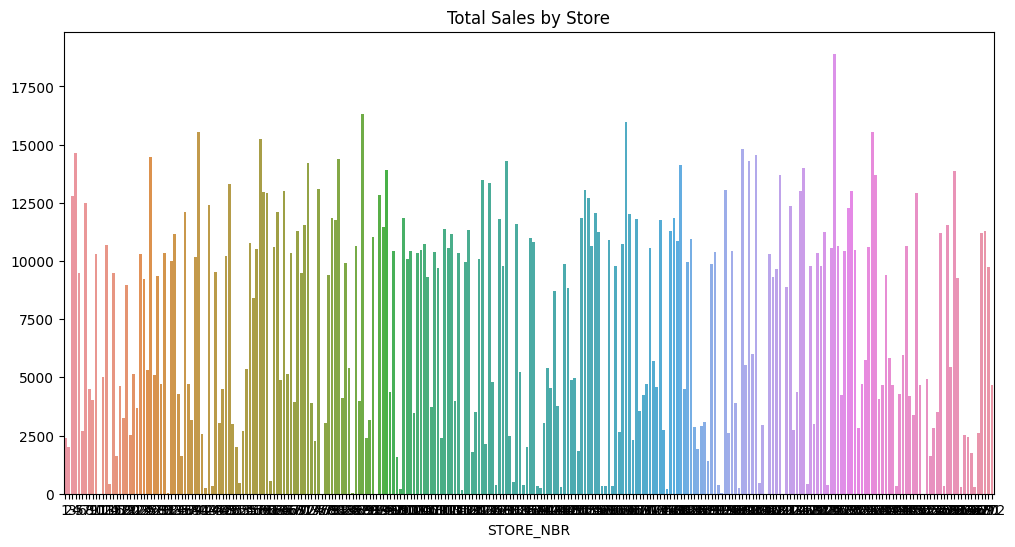


Total Sales by Store:
 STORE_NBR
1       2393.60
2       2005.80
3      12802.45
4      14647.65
5       9500.80
         ...   
268     2601.05
269    11221.80
270    11293.95
271     9721.80
272     4653.95
Name: TOT_SALES, Length: 272, dtype: float64


In [36]:
store_sales = df.groupby('STORE_NBR')['TOT_SALES'].sum()
plt.figure(figsize=(12,6))
sns.barplot(x=store_sales.index, y=store_sales.values)
plt.title('Total Sales by Store')
plt.show()

fig_store = px.bar(x=store_sales.index, y=store_sales.values, title='Total Sales by Store')
fig_store.show()

print("\nTotal Sales by Store:\n", store_sales)

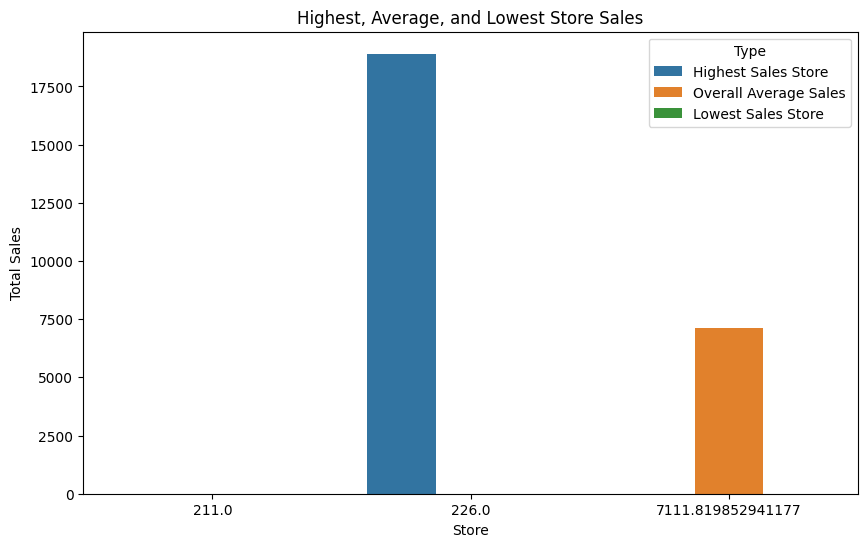

In [34]:
store_sales = df.groupby('STORE_NBR')['TOT_SALES'].agg(['sum', 'mean']).reset_index() # Calculating sum and mean

# Identify stores with highest, average, and lowest total sales
highest_sales_store = store_sales.loc[store_sales['sum'].idxmax()]
lowest_sales_store = store_sales.loc[store_sales['sum'].idxmin()]

# Calculate overall average sales
overall_avg_sales = store_sales['sum'].mean()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Store': [highest_sales_store['STORE_NBR'], overall_avg_sales, lowest_sales_store['STORE_NBR']],
    'Sales': [highest_sales_store['sum'], overall_avg_sales, lowest_sales_store['sum']],
    'Type': ['Highest Sales Store', 'Overall Average Sales', 'Lowest Sales Store']
})

# Plotting with Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x='Store', y='Sales', hue='Type', data=plot_data) 
plt.title('Highest, Average, and Lowest Store Sales')
plt.ylabel('Total Sales')
plt.show()

In [43]:
#Improved printing with more context
highest_store_num = highest_sales_store['STORE_NBR']
highest_store_sales = highest_sales_store['sum']
lowest_store_num = lowest_sales_store['STORE_NBR']
lowest_store_sales = lowest_sales_store['sum']

print("\nDetailed Store Sales Information:")
print(f" Highest sales is Store Number :  {highest_store_num}  ${highest_store_sales:.2f}.")
print(f" Lowest sales is Store Number : {lowest_store_num}  ${lowest_store_sales:.2f}.")



Detailed Store Sales Information:
 Highest sales is Store Number :  226.0  $18905.45.
 Lowest sales is Store Number : 211.0  $5.20.


## Conclusion: Charting a Course for Success 🚀

This project has illuminated key pathways to growth by identifying our star products and most loyal customers.  Here's the gist:

1.  **Product Champions ✨:**  *Dorito Corn Chp Supreme*, *Smiths Crnkle Chip Orgnl*, and *Smiths Crinkle Chips Salt & Vinegar* are our profit powerhouses 💰.  Keep them stocked and shining!

2.  **Family Loyalty 💖:** "OLDER FAMILIES" (Budget segment) are our loyalty linchpins 🔗.  Show them the love with targeted deals and appreciation!

3.  **Value is King 👑:**  Our loyal customers are value-seekers.  Keep prices competitive and value high!

4.  **Dip & Chips = Dynamic Duo 🤝:**  *Old El Paso Salsa Dip* is the perfect partner for our chips 🍟.  Bundle them up for extra sales!

5.  **The Winning Formula 🏆:**

    *   **Prioritize Top Sellers:**  Keep those Doritos and Smiths chips flowing!
    *   **Reward Loyalty:**  Treat our "OLDER FAMILIES" and "Budget" VIPs like royalty.
    *   **Cross-Sell Smarts:**  Chips and dip deals are a no-brainer.
    *   **Stay Sharp:**  Keep analyzing data to stay ahead of the game.

By following this roadmap, we're set to win! 🎉